<a href="https://colab.research.google.com/github/Helothlad/Buy_Hold_Sell/blob/main/Buy_Hold_Sell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn numpy mplfinance requests pandas matplotlib beautifulsoup4 pandas_datareader yfinance


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from bs4 import BeautifulSoup
import mplfinance as mpf
import sklearn
import matplotlib.dates as mdates
import datetime as dt
import yfinance as yf
from mplfinance.original_flavor import candlestick_ohlc
import bs4 as bs
import pickle
import requests
import os
from matplotlib import style
from collections import Counter
from sklearn import svm, neighbors, model_selection
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split

style.use('ggplot')

In [ ]:
def save_sp500_tickers():
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    headers = {"User-Agent": "Mozilla/5.0"}
    resp = requests.get(url, headers=headers)

    soup = bs.BeautifulSoup(resp.text, "lxml")  # specify parser
    table = soup.find("table", {"id": "constituents"})  # more reliable than class

    tickers = []
    for row in table.findAll("tr")[1:]:
        ticker = row.findAll("td")[0].text.strip()
        tickers.append(ticker)

    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)

    print(tickers)
    return tickers

save_sp500_tickers()

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'AON', 'APA', 'APO', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BAX', 'BDX', 'BRK.B', 'BBY', 'TECH', 'BIIB', 'BLK', 'BX', 'XYZ', 'BK', 'BA', 'BKNG', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CDW', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'COIN', 'CL', 'CMCSA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CRWD', 'CCI', 'CSX', 'CMI', 'CVS', 'DHR', 'DRI', 'DDOG', '

/tmp/ipython-input-2071109997.py:10: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  for row in table.findAll("tr")[1:]:
/tmp/ipython-input-2071109997.py:11: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  ticker = row.findAll("td")[0].text.strip()


['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'AON',
 'APA',
 'APO',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'XYZ',
 'BK',
 'BA',
 'BKNG',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'COIN',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'CEG',


In [ ]:
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)

    if not os.path.exists("stock_dfs"):
        os.makedirs("stock_dfs")

    start = dt.datetime(2000, 1, 1)
    end = dt.datetime(2024, 12, 31)

    for ticker in tickers:
        file_path = f'stock_dfs/{ticker}.csv'
        if not os.path.exists(file_path):
            print(f"Downloading {ticker}...")
            try:
                df = yf.download(ticker, start=start, end=end)
                if not df.empty:
                    df.to_csv(file_path)
                else:
                    print(f"⚠️ No data found for {ticker}")
            except Exception as e:
                print(f"❌ Failed to download {ticker}: {e}")
        else:
            print(f"Already have {ticker}")

get_data_from_yahoo()

/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


ERROR:yfinance:Failed to get ticker 'AOS' reason: Failed to perform, curl: (28) Connection timed out after 10002 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


ERROR:yfinance:Failed to get ticker 'ACGL' reason: Failed to perform, curl: (28) Connection timed out after 10001 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


⚠️ No data found for BRK.B


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2000-01-01 00:00:00 -> 2024-12-31 00:00:00)')


⚠️ No data found for BF.B


/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


ERROR:yfinance:Failed to get ticker 'COIN' reason: Failed to perform, curl: (28) Connection timed out after 10002 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COIN']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


⚠️ No data found for COIN


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed


/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1846221511.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed


In [ ]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        file_path = f'stock_dfs/{ticker}.csv'
        if not os.path.exists(file_path):
            print(f"⚠️ File not found for {ticker}, skipping...")
            continue  # skip missing tickers

        df = pd.read_csv(file_path, index_col=0)
        df = df[['Close']].rename(columns={'Close': ticker})

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

        if count % 10 == 0:
            print(count)

    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv', index_label='Date')

compile_data()

0
10
20
30
40
50
⚠️ File not found for BRK.B, skipping...
60
70
⚠️ File not found for BF.B, skipping...
80
90
100
110
⚠️ File not found for COIN, skipping...
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
                           MMM                 AOS                 ABT ABBV  \
Price                                                                         
2000-01-03  19.426918029785156   2.277505397796631   8.170222282409668  NaN   
2000-01-04  18.654998779296875  2.2446892261505127  7.9367852210998535  NaN   
2000-01-05  19.195341110229492  2.2381246089935303   7.922199726104736  NaN   
2000-01-06   20.73920440673828  2.2053074836730957     8.1993989944458  NaN   
2000-01-07   21.15089988708496    2.29719614982605   8.286940574645996  NaN   

            ACN                ADBE     AMD                 AES  \
Price                                                            

           MMM       AOS       ABT      ABBV       ACN      ADBE       AMD  \
MMM   1.000000  0.862502  0.768565  0.147887  0.731266  0.711978  0.417420   
AOS   0.862502  1.000000  0.936719  0.890762  0.952146  0.913353  0.770441   
ABT   0.768565  0.936719  1.000000  0.871498  0.984864  0.972551  0.844459   
ABBV  0.147887  0.890762  0.871498  1.000000  0.931031  0.827944  0.912800   
ACN   0.731266  0.952146  0.984864  0.931031  1.000000  0.971215  0.896035   

           AES       AFL         A  ...       WMB       WTW      WDAY  \
MMM   0.082934  0.692772  0.706243  ...  0.658384  0.770470  0.354271   
AOS   0.261716  0.920099  0.917845  ...  0.801592  0.951034  0.841897   
ABT   0.363655  0.903759  0.967400  ...  0.754732  0.972875  0.943635   
ABBV  0.739363  0.949250  0.901692  ...  0.700980  0.930013  0.798542   
ACN   0.745425  0.937418  0.982819  ...  0.789193  0.977915  0.926911   

          WYNN       XEL       XYL       YUM      ZBRA       ZBH       ZTS  
MMM   0.693023 

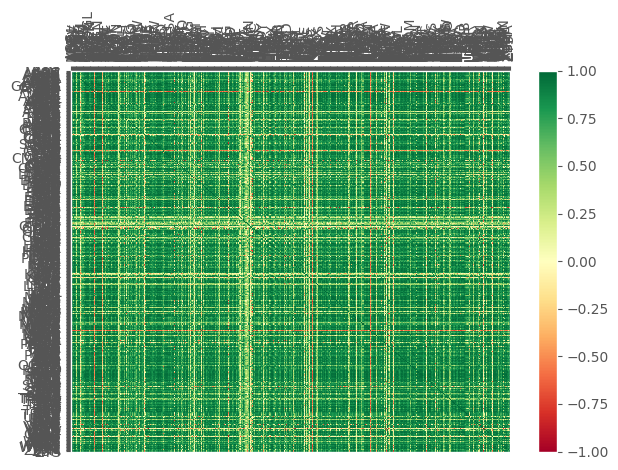

In [ ]:
def visualize_data():
  df = pd.read_csv('sp500_joined_closes.csv', index_col="Date", parse_dates=True, low_memory=False)
  df = df.apply(pd.to_numeric, errors="coerce")


  df_corr = df.corr()
  print(df_corr.head())

  data = df_corr.values
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)

  heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
  fig.colorbar(heatmap)
  ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
  ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)

  ax.invert_yaxis()
  ax.xaxis.tick_top()

  column_labels = df_corr.columns
  row_labels = df_corr.index

  ax.set_xticklabels(column_labels)
  ax.set_yticklabels(row_labels)
  plt.xticks(rotation=90)
  heatmap.set_clim(-1, 1)
  plt.tight_layout()
  plt.show()

visualize_data()

In [ ]:
def process_data_for_labels(ticker):
    hm_days = 7

    # Read data safely
    df = pd.read_csv("sp500_joined_closes.csv", index_col=0, low_memory=False)
    df = df.apply(pd.to_numeric, errors="coerce")
    df.fillna(0, inplace=True)

    # Get tickers
    tickers = df.columns.values.tolist()

    # Add forward return columns
    for i in range(1, hm_days + 1):
        df[f"{ticker}_{i}d"] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]

    df.fillna(0, inplace=True)
    return tickers, df

tickers, df = process_data_for_labels("XOM")
print(df)


                   MMM        AOS         ABT        ABBV         ACN  \
Date                                                                    
2000-01-03   19.426918   2.277505    8.170222    0.000000    0.000000   
2000-01-04   18.654999   2.244689    7.936785    0.000000    0.000000   
2000-01-05   19.195341   2.238125    7.922200    0.000000    0.000000   
2000-01-06   20.739204   2.205307    8.199399    0.000000    0.000000   
2000-01-07   21.150900   2.297196    8.286941    0.000000    0.000000   
...                ...        ...         ...         ...         ...   
2024-12-26  129.302429  67.866951  113.629478  174.394058  355.356506   
2024-12-27  128.316742  67.413780  113.353470  173.235962  351.166351   
2024-12-30  127.281792  67.009865  111.194641  171.474518  347.528290   
Date          0.000000   0.000000    0.000000    0.000000    0.000000   
Ticker        0.000000   0.000000    0.000000    0.000000    0.000000   

                  ADBE         AMD        AES     

In [ ]:
def buy_sell_hold(*args):
  cols = [c for c in args]
  requirement = 0.028
  for col in cols:
    if col > requirement:
      return 1
    if col < -requirement:
      return -1
  return 0

def extract_featuressets(ticker):
  tickers, df = process_data_for_labels(ticker)

  df['{}_target'.format(ticker)] = list(map(buy_sell_hold,
                                          df['{}_1d'.format(ticker)],
                                          df['{}_2d'.format(ticker)],
                                          df['{}_3d'.format(ticker)],
                                          df['{}_4d'.format(ticker)],
                                          df['{}_5d'.format(ticker)],
                                          df['{}_6d'.format(ticker)],
                                          df['{}_7d'.format(ticker)],
                                          ))
  vals = df['{}_target'.format(ticker)].values.tolist()
  str_vals = [str(i) for i in vals]
  print('Data spread:', Counter(str_vals))

  df.fillna(0, inplace=True)

  df = df.replace([np.inf, -np.inf], np.nan)
  df.dropna(inplace=True)

  df_vals = df[[ticker for ticker in tickers]].pct_change()
  df_vals = df_vals.replace([np.inf, -np.inf], 0)
  df_vals.fillna(0, inplace=True)

  X = df_vals.values
  y = df['{}_target'.format(ticker)].values

  return X, y, df

extract_featuressets("XOM")

Data spread: Counter({'1': 2575, '-1': 2205, '0': 1510})


(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.03973452, -0.01440882, -0.02857169, ..., -0.0144284 ,
          0.        ,  0.        ],
        [ 0.02896502, -0.00292451, -0.00183771, ...,  0.01914411,
          0.        ,  0.        ],
        ...,
        [-0.00806559, -0.00599159, -0.0190451 , ..., -0.01341661,
         -0.01153516, -0.01433788],
        [-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]),
 array([ 1,  1,  1, ..., -1,  0,  0]),
                    MMM        AOS         ABT        ABBV         ACN  \
 Date                                                                    
 2000-01-03   19.426918   2.277505    8.170222    0.000000    0.000000   
 2000-01-04   18.654999   2.244689    7.936785    0.000000    0.000000   
 2000-01-05   19.195341   2.238125    

In [ ]:
def do_ml(ticker):
  X, y, df = extract_featuressets(ticker)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

  clf = VotingClassifier([('lsvc', svm.LinearSVC()),
                          ('knn', neighbors.KNeighborsClassifier()),
                          ('rfor', RandomForestClassifier())])

  clf.fit(X_train, y_train)
  confidence = clf.score(X_test, y_test)
  print('Accuracy', confidence)
  predictions = clf.predict(X_test)
  print('Predicted spread:', Counter(predictions))

  return confidence

do_ml("BAC")
#

Data spread: Counter({'1': 2722, '-1': 2461, '0': 1107})
Accuracy 0.4424666242848061
Predicted spread: Counter({np.int64(-1): 774, np.int64(1): 706, np.int64(0): 93})


0.4424666242848061